In [7]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
mouse_id = "7004"
experiment = "clickbait-motivate"
exp_prefix = "m"
num_sessions = 7
cy_f1_dists = [[] for x in range(num_sessions)]
cy_f0_dists = [[] for x in range(num_sessions)]
cy_diffs = []

for ii in range(1, num_sessions):
    session_id = f"{exp_prefix}{ii}"

    # print("=== Testing SessionData Class ===")
    print(f"Loading data for {mouse_id}_{session_id}...")

    data = SessionData(
        mouse_id=mouse_id,
        session_id=session_id,
        experiment=experiment,
        min_spikes=50,
        verbose=False)

    flip_1_df = data.events[data.events['flip_state'] == True] 
    flip_1_df = flip_1_df[flip_1_df['drinking'] == False]
    flip_0_df = data.events[data.events['flip_state'] == False] 
    flip_0_df = flip_0_df[flip_0_df['drinking'] == False]

    print(f"f0/f1 frames: {len(flip_1_df)}/{len(flip_0_df)}")
    print(f"f0/f1 median: {np.median(flip_0_df['centroid_y'])}/{np.median(flip_1_df['centroid_y'])}")
    cy_diffs.append(np.median(flip_1_df['centroid_y']) - np.median(flip_0_df['centroid_y']))
    cy_f1_dists[ii] = np.array(flip_1_df['centroid_y'])
    cy_f0_dists[ii] = np.array(flip_0_df['centroid_y'])

Loading data for 7004_m1...
f0/f1 frames: 31814/39453
f0/f1 median: 912.0/1241.0
Loading data for 7004_m2...
f0/f1 frames: 27625/44598
f0/f1 median: 1049.0/1107.0
Loading data for 7004_m3...
f0/f1 frames: 45075/28320
f0/f1 median: 946.0/1132.0
Loading data for 7004_m4...
f0/f1 frames: 34256/38990
f0/f1 median: 960.0/1118.0
Loading data for 7004_m5...
f0/f1 frames: 30956/43198
f0/f1 median: 901.0/1087.0
Loading data for 7004_m6...
f0/f1 frames: 35280/38343
f0/f1 median: 862.0/1013.0


C:\Users\hssla\AppData\Local\Temp\ipykernel_58976\2817708358.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


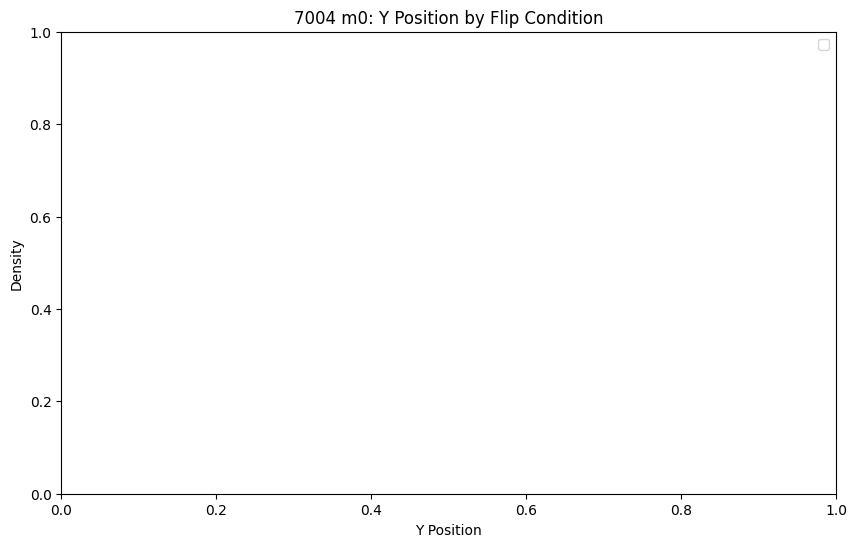

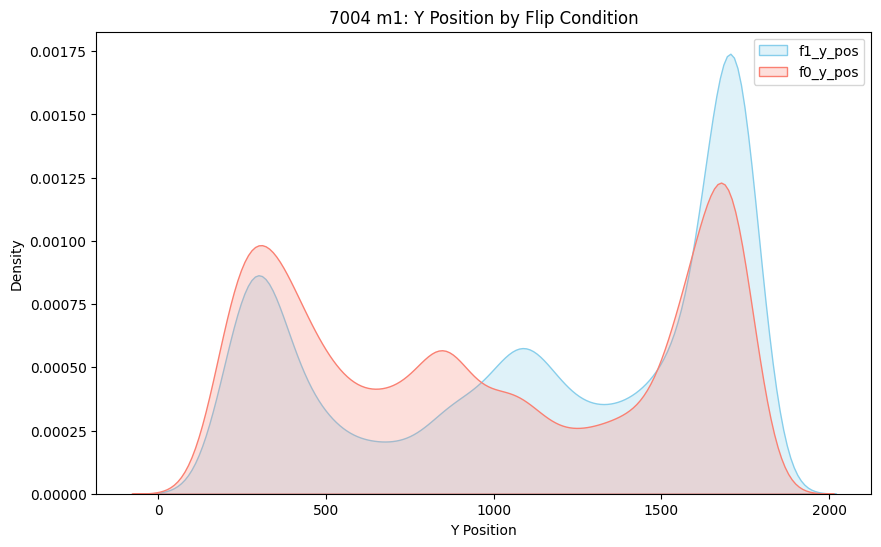

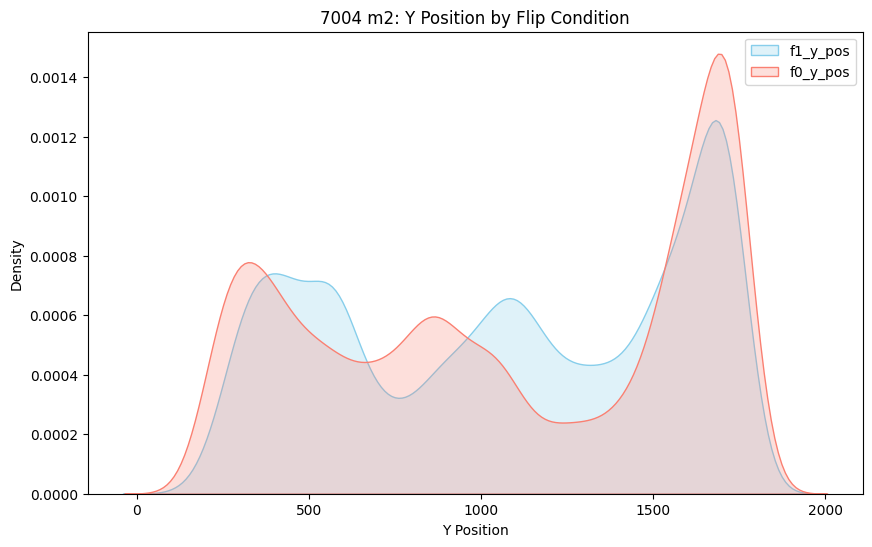

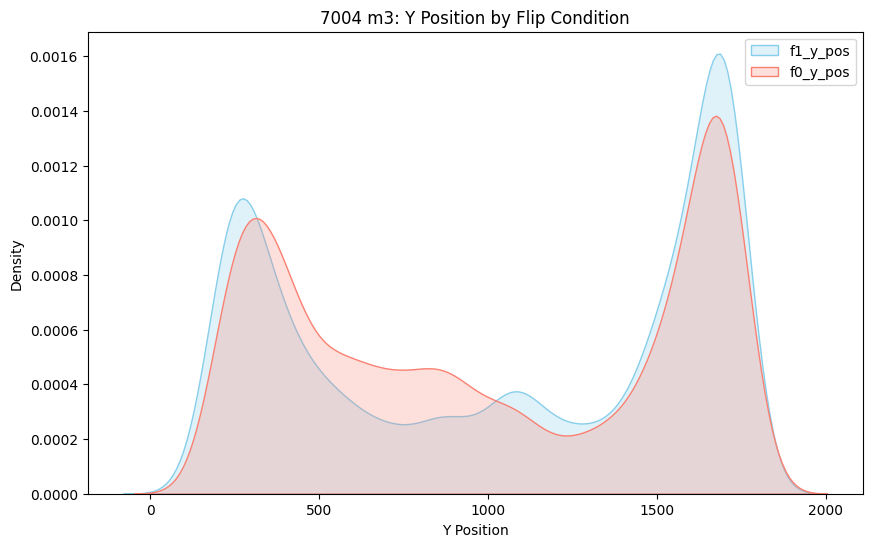

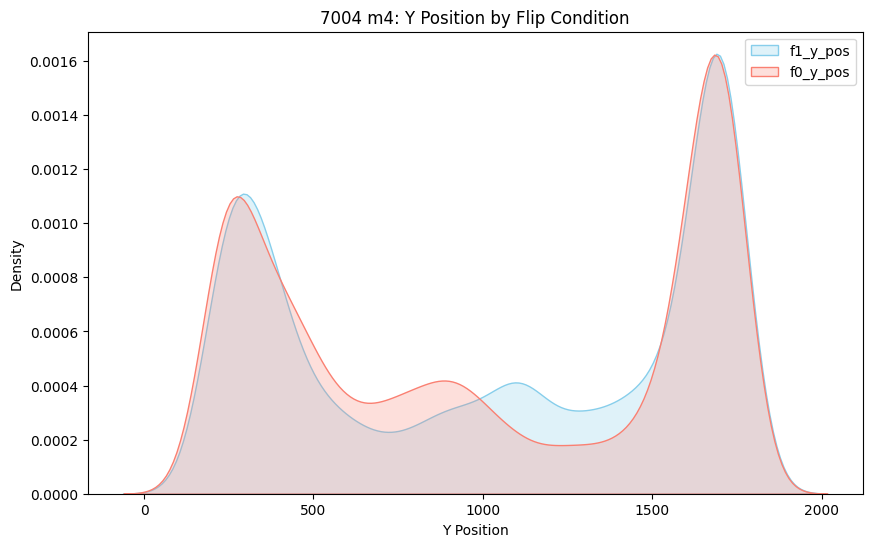

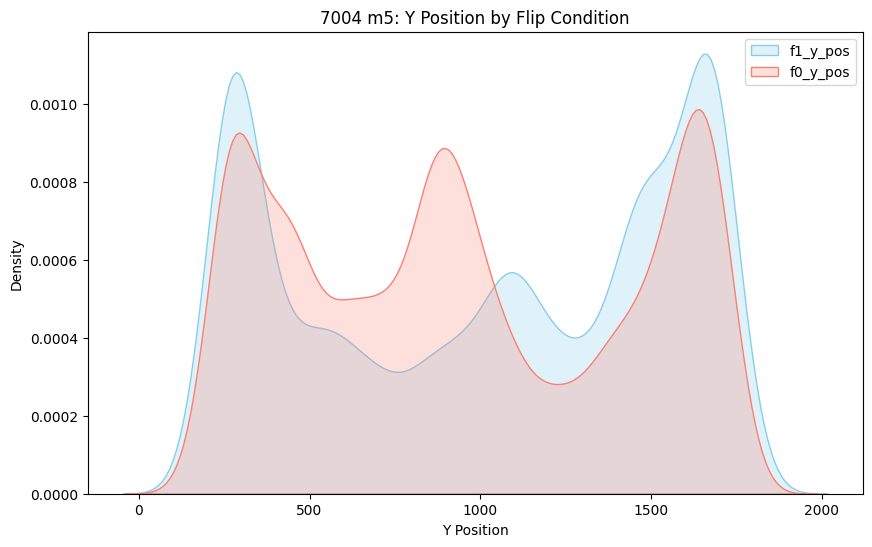

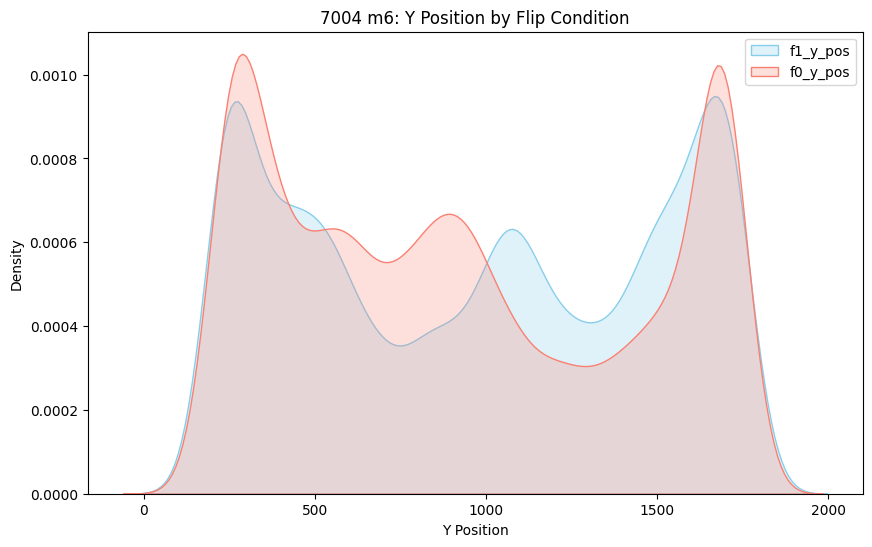

In [10]:
for ii in range(num_sessions):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(cy_f1_dists[ii], label='f1_y_pos', color='skyblue', fill=True, alpha=0.26)
    sns.kdeplot(cy_f0_dists[ii], label='f0_y_pos', color='salmon', fill=True, alpha=0.25)
    plt.title(f"{mouse_id} m{ii}: Y Position by Flip Condition")
    plt.xlabel('Y Position')
    plt.ylabel('Density')
    ax.legend()
    plt.show()